##  필수분석과제
- 고객 장바구니 데이터
- 시계열 데이터로 만들고 다양한 인사이트를 도출해 주세요! ' 시각화 필수 ' 
- 추가 분석 원하시는 분은 : 고객데이터 분석 RFM, 장바구니분석(apriori, Fb-growth), 비지도학습(클러스터링, k-means, gmm) 시각화 필수
- 주의사항 : 꼭 코드에 대한 주석처리 필수
- 분석 목적을 정확히 잡고 진행 주세요!

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
import pandas as pd
filepath = '/content/drive/MyDrive/Colab Notebooks/BDAA 학회/데이터셋/sales_data.csv'

In [192]:
sales = pd.read_csv(filepath, encoding = 'latin')

In [193]:
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


- InvoiceNo: 주문번호 (C로 시작하는 것은 취소 주문)
- StockCode: 제품 코드
- Description: 제품 설명
- Quantity: 주문 제품 건수
- InvoiceDate: 주문 일자
- UnitPrice: 제품 단가
- CustomerID: 고객 번호
- Country: 주문 고객의 국적

#### 데이터 특성 파악과 기본적인 전처리

In [194]:
sales.isnull().sum() # 결측치가 없는지 파악

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [195]:
sales = sales.dropna() # 결측치가 있는 데이터를 제거

In [196]:
sales.shape 

(406829, 8)

In [197]:
sales = sales.query("(Quantity > 0) and (UnitPrice > 0)") # 주문 제품 건수와 제품 단가가 0보다 큰 데이터들만 남김
                                                          # 주문 제품 건수 또는 제품 단가가 0이하인 행들을 삭제한다는 명제의 대우

In [198]:
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### 시계열 데이터로 만들기

In [199]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [200]:
sales['CustomerID'] = sales['CustomerID'].astype(int)

In [201]:
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'])

In [202]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [203]:
sales_df = sales.set_index('InvoiceDate')

In [204]:
sales_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France


#### 분석할 타겟 선정

In [205]:
sales_country = sales_df.groupby('Country').sum().sort_values('Quantity', ascending = False)
# 주문량이 많은 나라의 순서대로 sorting

In [206]:
sales_country

,Quantity,UnitPrice,CustomerID
Country,,,
United Kingdom,4256740,1050205.164,5510572531
Netherlands,200361,6247.730,34020369
EIRE,140275,32179.280,106694901
Germany,119261,33532.140,114347054
France,111471,36832.040,105750585
Australia,83901,3612.500,14721267
Sweden,36083,1695.790,6637579
Switzerland,30082,6389.270,23312286
Spain,27940,9504.340,32067768


In [207]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7fb6d7fc45e0>,
 [Text(-0.9355537305133629, 0.5785665193584315, 'United Kingdom'),
  Text(0.6073179573491538, -0.9171504231483796, 'Netherlands'),
  Text(0.7829102768105011, -0.7726910756987587, 'EIRE'),
  Text(0.8945927791279786, -0.6400810570014394, 'Germany'),
  Text(0.975294108202641, -0.5087252721314477, 'France'),
  Text(1.0287025015254059, -0.3895781864470501, 'Australia'),
  Text(1.0543579234994949, -0.31357514116050994, 'Sweden'),
  Text(1.0661145782422399, -0.27092380120500914, 'Switzerland'),
  Text(1.0750056152976812, -0.233158587829087, 'Spain'),
  Text(1.082073766293971, -0.19777857391128348, 'Japan'),
  Text(1.0875096953557453, -0.16529568205871137, 'Belgium'),
  Text(1.0914230048765095, -0.1370978644120005, 'Norway'),
  Text(1.094124435748041, -0.113541706429977, 'Portugal'),
  Text(1.0958304975673185, -0.09568448464282772, 'Finland'),
  Text(1.0969225909999778, -0.0822242625621858, 'Channel Islands'),
  Text(1.0977449282006257, -0.070399

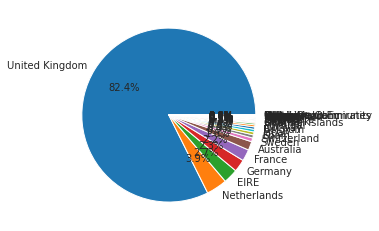

In [208]:
plt.pie(sales_country['Quantity'], labels = sales_country.index,  autopct='%.1f%%') # 주문 국적의 비율을 명확히 보이기 위한 파이플롯 시각화

- 영국의 비율이 약 82.4% 차지하므로 영국에 한해서 분석을 하고자 함.

#### RFM 기법을 이용한 고객 segmentation
- RECENCY (R): 가장 최근 상품 구입 일에서 오늘까지의 기간
- FREQUENCY (F): 상품 구매 횟수
- MONETARY VALUE (M): 총 구매 금액

##### 추가 전처리

In [209]:
sales_uk = sales_df[sales_df['Country'] == 'United Kingdom'] # 주문 국적이 영국인 데이터만 추출

In [210]:
sales_uk['Tot_Price'] = sales_uk['Quantity'] * sales_uk['UnitPrice'] # 주문 건수와 제품 단가를 곱하여 주문 금액을 컬럼을 생성

<ipython-input-210-9a2518c5f2be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_uk['Tot_Price'] = sales_uk['Quantity'] * sales_uk['UnitPrice'] # 주문 건수와 제품 단가를 곱하여 주문 금액을 컬럼을 생성


In [211]:
sales_uk

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Tot_Price
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-12-09 12:31:00,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95,15804,United Kingdom,23.40
2011-12-09 12:49:00,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,13113,United Kingdom,23.60
2011-12-09 12:49:00,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25,13113,United Kingdom,30.00


##### 고객 기준의 RFM 데이터로 변경

In [212]:
sales_uk = sales_uk.reset_index(drop = False) # 시계열이 index에 있으면 agg 메서드가 적용되지 않으므로 다시 컬럼으로 가져옴

In [213]:
uk_rfm = sales_uk.groupby('CustomerID').agg({"InvoiceDate" : "max",
                                             "InvoiceNo" : "count",
                                             "Tot_Price" : "sum"})
# 순서대로 최근 구입 일자, 상품 구매 횟수, 총 구매 금액을 구하기 위한 데이터프레임 생성

In [214]:
uk_rfm.rename(columns = {"InvoiceDate" : "Recency",
                         "InvoiceNo" : "Frequency",
                         "Tot_Price" : "Monetary"}, inplace = True) # 컬럼이름을 RFM 데이터에 맞게 변경

In [215]:
uk_rfm.reset_index(drop = False, inplace = True) # 인덱스를 재정렬

In [216]:
uk_rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34
...,...,...,...,...
3915,18280,2011-03-07 09:52:00,10,180.60
3916,18281,2011-06-12 10:53:00,7,80.82
3917,18282,2011-12-02 11:43:00,12,178.05
3918,18283,2011-12-06 12:02:00,756,2094.88


##### Recency 컬럼 처리

In [217]:
print(uk_rfm['Recency'].min())
print(uk_rfm['Recency'].max()) # 2010년 12월 1일부터 2011년 12월 9일까지의 데이터이므로 2011년 12월 10일을 '오늘'로 생각

2010-12-01 09:53:00
2011-12-09 12:49:00


In [218]:
import datetime

In [219]:
uk_rfm['Recency'] = (datetime.datetime(2011, 12, 10) - uk_rfm['Recency']).map(lambda x : x.days + 1) # 해당일부터 오늘까지이므로 1일을 더해주어 날짜 계산

In [220]:
uk_rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34
...,...,...,...,...
3915,18280,278,10,180.60
3916,18281,181,7,80.82
3917,18282,8,12,178.05
3918,18283,4,756,2094.88


##### 시각화 - R,F,M 분포

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [222]:
import numpy as np

In [223]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(1, 3)

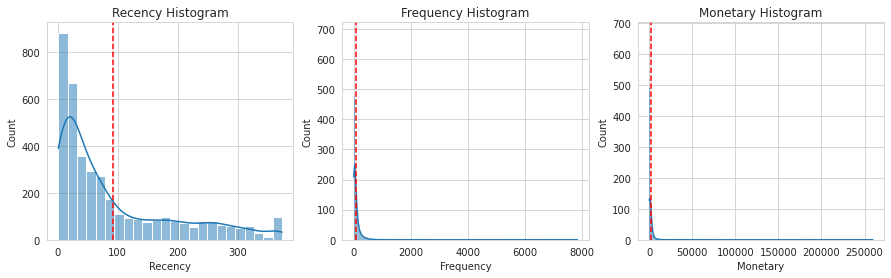

In [224]:
sns.set_style('whitegrid')
plt.figure(figsize = (15, 4))
plt.subplots_adjust(wspace = 0.2)

features = ['Recency', 'Frequency', 'Monetary']

for idx, feature in enumerate(features):
  ax = plt.subplot(grid[idx])
  sns.histplot(uk_rfm[feature],
               kde = True,
               ax = ax)
  ax.set_title(f'{feature} Histogram')
  plt.rcParams['axes.unicode_minus'] = False
  ax.axvline(x = np.mean(uk_rfm[feature]), color="red", linestyle="--") # 각 특성의 평균을 같이 그려줌

- Recency, Frequency, Monetary 분포 모두 왼쪽으로 치우져진 특징을 보임
- 개인 고객과 소매업체의 대규모 주문이 포함되어 이와 같은 현상이 일어난 것이라 추측

 #### 군집화
 - 치우친 데이터 셋을 분리해보기위해 군집화를 진행해봄

In [225]:
## 표준화
from sklearn.preprocessing import StandardScaler

features = uk_rfm[['Recency', 'Frequency', 'Monetary']].values
ss = StandardScaler()
ss.fit(features)
features_scaled = ss.transform(features) # kmean 알고리즘에 적용하기 위해 변수에 대해 표준화를 진행

In [226]:
# KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(features_scaled) # 클러스터의 개수가 3인 kmeans 알고리즘을 학습

KMeans(n_clusters=3)

In [227]:
print(km.predict(features_scaled)) # 학습된 kmeans 알고리즘의 예측

[0 2 0 ... 2 2 2]


In [228]:
uk_rfm['cluster label'] = km.predict(features_scaled) # 예측 결과를 기존 데이터프레임의 컬럼으로 생성

#### 실루엣 계수 (Silhouette Coefficient)
- 클러스터링 결과를 평가하는 지표
- 각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 도출
- 군집 안에 있는 데이터들은 잘 모여있는지, 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 척도로 활용.

In [230]:
from sklearn.metrics import silhouette_score
silhouette_km = silhouette_score(features_scaled, km.predict(features_scaled))
print(silhouette_km) 

0.5923691942714455


- 실루엣 스코어가 0.592로 좋은편

#### 시각화 - 실루엣 계수, 클러스터링 결과

In [231]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA

import matplotlib.cm as cm
import math

In [232]:
### 실루엣 계수 시각화
def visualize_silhouette(cluster_lists, X_features): 
    
    n_cols = len(cluster_lists) # 클러스터 개수대로 클러스터링을 적용하고 실루엣 계수를 구함
    fig, ax = plt.subplots(figsize = (4*n_cols, 4), nrows = 1, ncols = n_cols) # 실루엣 계수를 나타낼 도화지 생성
    
    for idx, n_cluster in enumerate(cluster_lists):
        # 클러스터링 개수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
        
        clusterer = KMeans(n_clusters = n_cluster, max_iter = 500)
        cluster_labels = clusterer.fit_predict(X_features)
        # KMeans 클러스터링 수행한 후 실루엣 스코어와 개별 데이터의 실루엣 값 계산 

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        ax[idx].set_title('# of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        ax[idx].set_xlabel("Silhouette coefficient values")
        ax[idx].set_ylabel("Cluster label")
        ax[idx].set_xlim([-0.1, 1])
        ax[idx].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        ax[idx].set_yticks([])  # y축에는 아무것도 표시하지 않음
        ax[idx].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
         
        for i in range(n_cluster): 
          # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            ax[idx].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            ax[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        ax[idx].axvline(x=sil_avg, color="red", linestyle="--")

In [233]:
## 군집개수별 클러스터링 결과 시각화 함수
def visualize_kmeans_plot_multi(cluster_lists, X_features):

    n_cols = len(cluster_lists)
    fig, ax = plt.subplots(figsize = (4*n_cols, 4), nrows = 1, ncols = n_cols) # 클러스터링 결과를 표시할 도화지 생성
    
    pca = PCA(n_components = 2) # 입력 데이터가 여러개일 경우 PCA 변환하여 2차원 시각화
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
    for idx, n_cluster in enumerate(cluster_lists):
    # 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화    
       
        clusterer = KMeans(n_clusters = n_cluster, max_iter = 500)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster'] = cluster_labels  # KMeans 클러스터링 결과를 dataframe에 저장
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster'] == label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster ' + str(label)           
            ax[idx].scatter(x = label_df['PCA1'], y = label_df['PCA2'], s = 70, 
                             edgecolor = 'k', marker = markers[label], label = cluster_legend)  # 클러스터링 결과값 별로 scatter plot 으로 시각화

        ax[idx].set_title('Number of Cluster : ' +  str(n_cluster))    
        ax[idx].legend(loc = 'upper right')

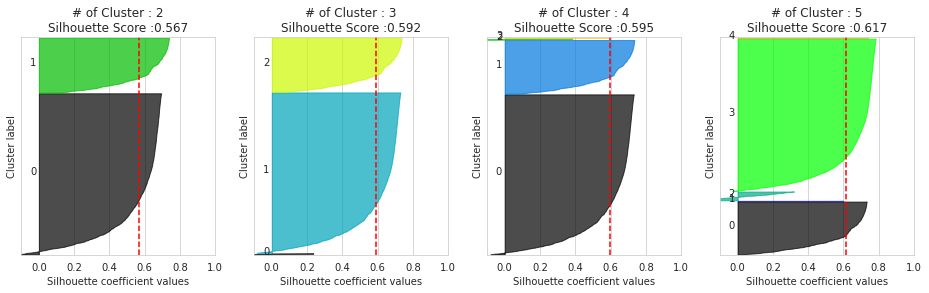

In [234]:
## 군집별 실루엣 스코어
visualize_silhouette([2, 3, 4, 5], features_scaled)

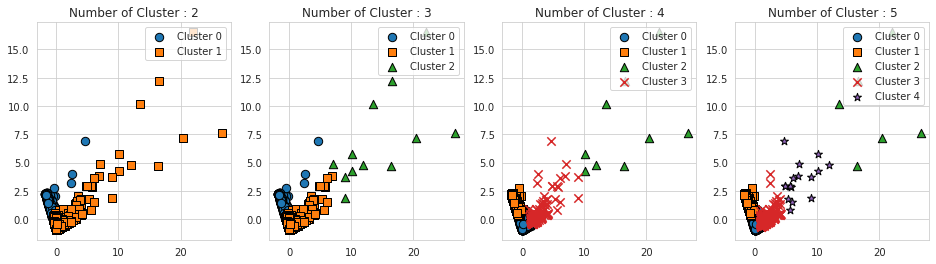

In [235]:
visualize_kmeans_plot_multi([2, 3, 4, 5], features_scaled)

- 군집수가 2일 때는 0번 군집의 실루엣 계수가 대부분 평균 아래이다.
- 군집수가 3인 경우는 2번 군집, 4인 경우는 2,3번 군집의 데이터 건수가 매우 작다.
- 이는 앞서 왜곡된 분포를 확인했듯이 소매업체의 대규모 주문이 소수의 군집을 이룬 것으로 추측.
- 왜곡정도가 너무 심해 굳이 군집분석하지 않아도 충분히 분리 가능

#### 왜곡을 피하기 위한 로그변환

In [236]:
uk_rfm['log_Recency'] = np.log1p(uk_rfm['Recency']) # log(x+1)
uk_rfm['log_Frequency'] = np.log1p(uk_rfm['Frequency'])
uk_rfm['log_Monetary'] = np.log1p(uk_rfm['Monetary']) 

- log(x+1)
- 0에 가까운 아주 작은 양수의 경우 음의 무한대에 가까워지게 됨.
- 너무 작은 값의 경우 프로그램의 계산이 -inf가 나옴
- 이를 방지하기 위해 1을 더함으로써 0보다 큰 양수의 값을 갖게 함

In [237]:
## 표준화
log_features = uk_rfm[['log_Recency', 'log_Frequency', 'log_Monetary']].values

ss = StandardScaler()
ss.fit(log_features)
log_features_scaled = ss.transform(log_features) # 마찬가지로 log 변환된 값들도 kmeans 알고리즘을 적용하기 위해 표준화를 진행

In [238]:
## KMeans
km = KMeans(n_clusters = 3)
km.fit(log_features_scaled) # 표준화된 값들로 kmeans 알고리즘 학습

KMeans(n_clusters=3)

In [239]:
print(km.predict(log_features_scaled)) # 학습된 kmeans 알고리즘으로 예측

[1 2 2 ... 1 2 1]


In [240]:
labels = km.predict(log_features_scaled)

In [241]:
uk_rfm['cluster log_label'] = labels  # 예측된 값을 데이터프레임에 컬럼으로 생성

In [242]:
## 실루엣 스코어
silhoutte_log_km = silhouette_score(log_features_scaled, labels)
print(silhoutte_log_km)

0.3046362318850125


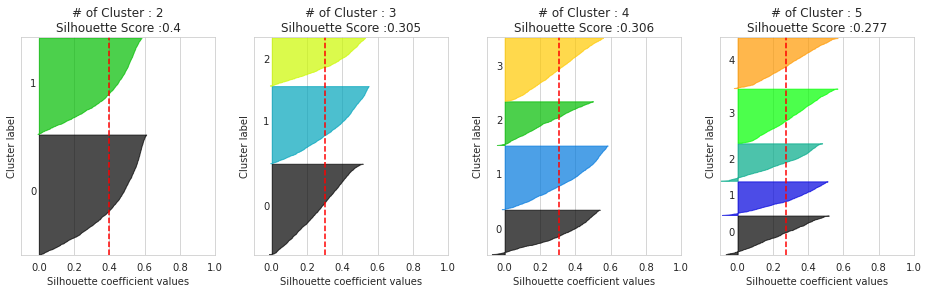

In [243]:
## 군집별 실루엣 스코어
visualize_silhouette([2, 3, 4, 5], log_features_scaled)

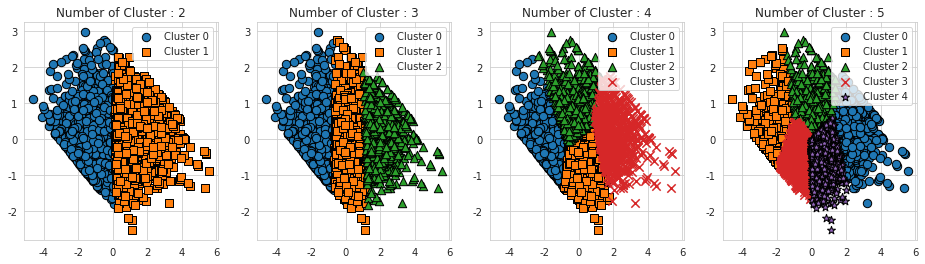

In [244]:
visualize_kmeans_plot_multi([2, 3, 4, 5], log_features_scaled)

- 전체 실루엣 스코어가 감소한 대신 각 군집별 실루엣 스코어가 균일하게 나타남.
- 왜곡된 데이터 셋은 로그 변환으로 1차 변환 후 적용하면 더 나은 결과가 나오기도 함.



#### 원본 vs log변환 데이터 셋

In [245]:
uk_rfm

,CustomerID,Recency,Frequency,Monetary,cluster label,log_Recency,log_Frequency,log_Monetary,cluster log_label
0,12346,326,1,77183.60,0,5.789960,0.693147,11.253955,1
1,12747,3,103,4196.01,2,1.386294,4.644391,8.342128,2
2,12748,1,4595,33719.73,0,0.693147,8.432942,10.425868,2
3,12749,4,199,4090.88,2,1.609438,5.298317,8.316760,2
4,12820,4,59,942.34,2,1.609438,4.094345,6.849427,2
...,...,...,...,...,...,...,...,...,...
3915,18280,278,10,180.60,1,5.631212,2.397895,5.201806,0
3916,18281,181,7,80.82,1,5.204007,2.079442,4.404522,0
3917,18282,8,12,178.05,2,2.197225,2.564949,5.187665,1
3918,18283,4,756,2094.88,2,1.609438,6.629363,7.647729,2


In [246]:
label_diff = uk_rfm['cluster label'] - uk_rfm['cluster log_label']

In [247]:
label_diff.value_counts()

 1    2294
 0    1022
 2     589
-2      14
-1       1
dtype: int64

#### 최적의 k 찾기 - inertia 탐색
- 엘보우(elbow) 방법 : 이니셔(inertia)의 변화를 관찰
- 이니셔(inertia): 클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱 합

In [248]:
inertia = []

for k in range(2, 7):
  km = KMeans(n_clusters = k)
  km.fit(features_scaled)
  inertia.append(km.inertia_)

Text(0, 0.5, 'inertia')

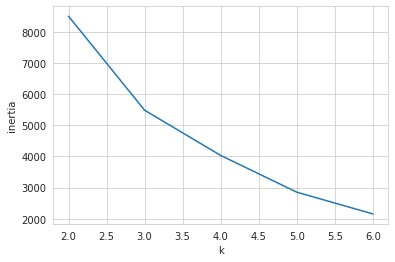

In [249]:
# inertia 변화 시각화
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')

In [250]:
inertia = []

for k in range(2, 7):
  km = KMeans(n_clusters = k)
  km.fit(log_features_scaled)
  inertia.append(km.inertia_)

Text(0, 0.5, 'inertia')

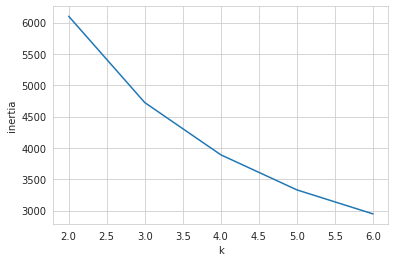

In [251]:
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')

- k=3 일 때, 그래프의 기울기가 조금 바뀐 것 같지만 뚜렷하지는 않음